## Connect

In [113]:
import psycopg2
import pandas as pd
import numpy as np

In [256]:
conn = psycopg2.connect(
    dbname = 'alphadb2',
    user = 'JohnnyReb',
    port = 5432,
    host = 'generallee.cej7hcqr7c1f.eu-central-1.rds.amazonaws.com',
    password = 'Mk9HEEr0?7')

In [263]:
cur = conn.cursor()

## Get data

In [264]:
def get_data():
    cur.execute('''
        SELECT
            fitness,
            booksize,
            drawdown,
            longcount,
            margin,
            pnl,
            returns,
            sharpe,
            shortcount,
            turnover
        FROM
            simsummary
        WHERE
            yearid = 'TOTAL'
        ''')
    data = cur.fetchall()
    return data

def get_bouded_sharpe(a, b):
    cur.execute('''
        SELECT
            fitness,
            booksize,
            drawdown,
            longcount,
            margin,
            pnl,
            returns,
            sharpe,
            shortcount,
            turnover
        FROM
            simsummary
        WHERE
            yearid = 'TOTAL'
        AND
            sharpe > %s
        AND
            sharpe < %s
            ''', (a, b))
    data = cur.fetchall()
    return data


In [118]:
data = get_data()
data

[(2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (1.99, 20000000.0, 24.55, 184.0, 191.79, 10965500.0, 22.3, 0.64, 0.0, 2.31),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (1.99, 20000000.0, 24.55, 184.0, 191.79, 10965500.0, 22.3, 0.64, 0.0, 2.31),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.42, 20000000.0, 31.01, 1986.0, 447.82, 9852330.0, 20.04, 0.51, 0.0, 0.89),
 (2.42, 20000000.0, 31.01, 1986.0, 447.82, 98

In [119]:
len(data)

3618

## Data processing

In [120]:
M = np.array(data)

In [121]:
y = M[:, 0]
X = M[:, 1:]

In [122]:
y

array([ 2.18,  2.18,  2.18, ...,  4.26, -0.29,  4.84])

In [123]:
X

array([[  2.00000000e+07,   2.93100000e+01,   1.85100000e+03, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       [  2.00000000e+07,   2.93100000e+01,   1.85100000e+03, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       [  2.00000000e+07,   2.93100000e+01,   1.85100000e+03, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       ..., 
       [  2.00000000e+07,   2.04200000e+01,   1.98600000e+03, ...,
          8.40000000e-01,   0.00000000e+00,   9.80000000e-01],
       [  2.00000000e+07,   8.82000000e+01,   0.00000000e+00, ...,
         -4.70000000e-01,   1.98000000e+03,   4.65100000e+01],
       [  2.00000000e+07,   1.89100000e+01,   1.98600000e+03, ...,
          1.16000000e+00,   0.00000000e+00,   2.14000000e+00]])

## Linear regression for non-normalized model

In [124]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
lr.coef_

array([  0.00000000e+00,  -6.61223465e-04,   1.51382906e-05,
         4.91956590e-03,   2.38123128e-06,  -1.15884266e+00,
         2.54443650e-01,  -7.63414650e-05,  -3.29514335e-04])

In [126]:
lr.intercept_

0.081614722576082044

In [127]:
np.mean((lr.predict(X) - y) ** 2)

0.021837782196923214

In [128]:
np.sort(np.abs((lr.predict(X) - y)))[-100: -1]

array([ 0.39840137,  0.39840137,  0.39840137,  0.40137908,  0.40137908,
        0.41025047,  0.41025047,  0.41528064,  0.41673224,  0.41747169,
        0.41747169,  0.41747169,  0.41747169,  0.41747169,  0.41747169,
        0.41747169,  0.42048691,  0.48634855,  0.48634855,  0.49513934,
        0.49980068,  0.50419689,  0.50419689,  0.50799105,  0.51501513,
        0.52138587,  0.52138587,  0.52138587,  0.52445189,  0.52445189,
        0.53916806,  0.54702627,  0.54702627,  0.54970386,  0.54970386,
        0.5711289 ,  0.61249139,  0.61249139,  0.61249139,  0.61249139,
        0.62456476,  0.62456476,  0.62456476,  0.62456476,  0.62456476,
        0.62456476,  0.62456476,  0.62456476,  0.62456476,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63169922,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63169922,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63169922,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63928509,  0.63

## Norm model

In [233]:
import sklearn.preprocessing
X_ = sklearn.preprocessing.scale(X)
X_[:,1].mean()

-2.16815693830611e-15

In [234]:
(X_[:,1]**2).mean()

0.99999999999999634

In [235]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [236]:
lr.coef_

array([  0.00000000e+00,  -1.67652118e-02,   8.04049559e-03,
         7.76819616e-01,   1.51502397e+01,  -1.49897401e+01,
         1.42212813e-01,  -4.07592422e-02,  -8.78019311e-03])

In [237]:
lr.intercept_

0.014085129906032183

In [238]:
names = ['booksize',
            'drawdown',
            'longcount',
            'margin',
            'pnl',
            'returns',
            'sharpe',
            'shortcount',
            'turnover'
        ]
res = list(zip(names, lr.coef_))
sorted(res, key = lambda name: np.abs(name[1]))

[('booksize', 0.0),
 ('longcount', 0.0080404955921292431),
 ('turnover', -0.0087801931057195914),
 ('drawdown', -0.016765211783479173),
 ('shortcount', -0.040759242184555816),
 ('sharpe', 0.14221281307401068),
 ('margin', 0.77681961648156939),
 ('returns', -14.989740110837838),
 ('pnl', 15.150239745738379)]

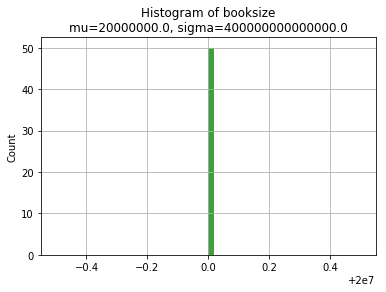

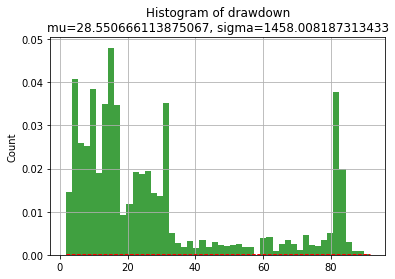

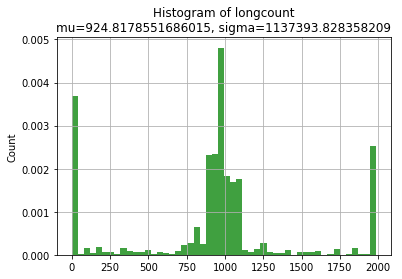

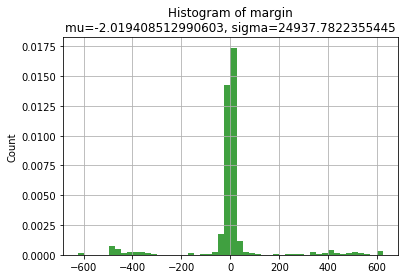

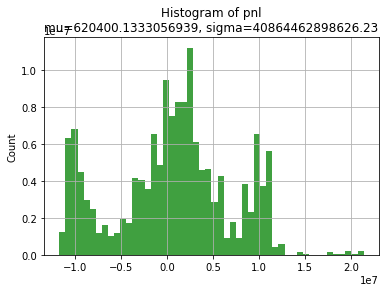

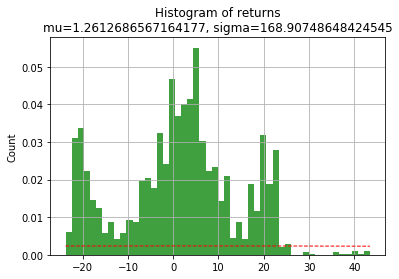

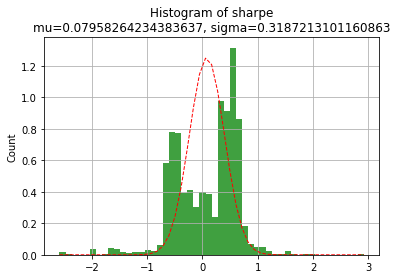

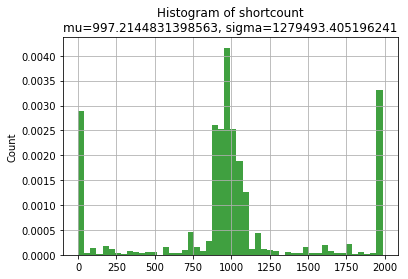

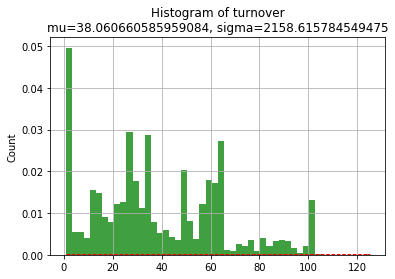

In [240]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

for i in range(0,9):
    param = X[:, i]
    m = X[:,i].mean()
    s = (X[:,i]**2).mean()
    # the histogram of the data
    n, bins, patches = plt.hist(param, 50, normed=1, facecolor='green', alpha=0.75)

    # add a 'best fit' line
    if s>0:
        y_axes = mlab.normpdf( bins, m, s)
        l = plt.plot(bins, y_axes, 'r--', linewidth=1)

    plt.ylabel('Count')
    plt.title('Histogram of {}\nmu={}, sigma={}'.format(names[i], m, s))
    #plt.axis([-5, 5, 0, 3])
    plt.grid(True)

    plt.show()

In [136]:
len(y)

3618

In [137]:
np.mean((lr.predict(X_) - y) ** 2)

0.021837782196923141

In [138]:
np.sort(np.abs((lr.predict(X_) - y)))[-100: -1]

array([ 0.39840137,  0.39840137,  0.39840137,  0.40137908,  0.40137908,
        0.41025047,  0.41025047,  0.41528064,  0.41673224,  0.41747169,
        0.41747169,  0.41747169,  0.41747169,  0.41747169,  0.41747169,
        0.41747169,  0.42048691,  0.48634855,  0.48634855,  0.49513934,
        0.49980068,  0.50419689,  0.50419689,  0.50799105,  0.51501513,
        0.52138587,  0.52138587,  0.52138587,  0.52445189,  0.52445189,
        0.53916806,  0.54702627,  0.54702627,  0.54970386,  0.54970386,
        0.5711289 ,  0.61249139,  0.61249139,  0.61249139,  0.61249139,
        0.62456476,  0.62456476,  0.62456476,  0.62456476,  0.62456476,
        0.62456476,  0.62456476,  0.62456476,  0.62456476,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63169922,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63169922,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63169922,  0.63169922,
        0.63169922,  0.63169922,  0.63169922,  0.63928509,  0.63

## Research params(returns, pnl)

In [173]:
import sklearn.preprocessing
P = M[:, 5:7] 
P

array([[  1.00996000e+07,   2.05400000e+01],
       [  1.00996000e+07,   2.05400000e+01],
       [  1.00996000e+07,   2.05400000e+01],
       ..., 
       [  1.25239000e+07,   2.54300000e+01],
       [ -8.73358000e+06,  -1.77300000e+01],
       [  1.83835000e+07,   3.73300000e+01]])

In [174]:
P_ = sklearn.preprocessing.scale(P)
P_[:,0].mean()

-1.4925718053556556e-16

In [175]:
(P_[:,1]**2).mean()

0.99999999999998967

### Regression for pnl, returns

In [176]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(P_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
lr.coef_

array([-104.28659521,  105.0940707 ])

In [178]:
lr.intercept_

0.014085129905978086

In [180]:
np.mean((lr.predict(P_) - y) ** 2)

0.38664893855662058

### Research returns

In [149]:
import sklearn.preprocessing
P = M[:, 6]
P = sklearn.preprocessing.scale(P)
P_ = np.reshape(P,(-1, 1))
P_

array([[ 1.49042052],
       [ 1.49042052],
       [ 1.49042052],
       ..., 
       [ 1.86846181],
       [-1.46819705],
       [ 2.78843957]])

In [150]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(P_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
lr.coef_

array([ 0.80748834])

In [152]:
lr.intercept_

0.014085129906025409

In [153]:
np.mean((lr.predict(P_) - y) ** 2)

0.3893269915093755

### Research relationsip between fitness and pnl

In [154]:
import sklearn.preprocessing
P = M[:, 5]
P = sklearn.preprocessing.scale(P)
P_ = np.reshape(P,(-1, 1))
P_

array([[ 1.48988845],
       [ 1.48988845],
       [ 1.48988845],
       ..., 
       [ 1.87092658],
       [-1.4702071 ],
       [ 2.79190625]])

In [155]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(P_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
lr.coef_

array([ 0.80746256])

In [157]:
lr.intercept_

0.014085129906025414

In [158]:
np.mean((lr.predict(P_) - y) ** 2)

0.38936862358962454

### Research relationship between pnl and returns

In [159]:
import sklearn.preprocessing
P = M[:, 5]
P = sklearn.preprocessing.scale(P)
X_ = np.reshape(P,(-1, 1))
X_

array([[ 1.48988845],
       [ 1.48988845],
       [ 1.48988845],
       ..., 
       [ 1.87092658],
       [-1.4702071 ],
       [ 2.79190625]])

In [160]:
Y = M[:,6]
Y = sklearn.preprocessing.scale(Y)
Y_ = np.reshape(Y,(-1, 1))
Y_

array([[ 1.49042052],
       [ 1.49042052],
       [ 1.49042052],
       ..., 
       [ 1.86846181],
       [-1.46819705],
       [ 2.78843957]])

In [161]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_, Y_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
lr.coef_

array([[ 0.99999988]])

In [163]:
np.mean((lr.predict(X_) - Y_) ** 2)

2.4624202994232517e-07

### Research relationship between fitness and returns

In [164]:
import sklearn.preprocessing
P = M[:, 6]
P_ = sklearn.preprocessing.scale(P)
X_ = np.reshape(P_,(-1,1))
X_

array([[ 1.49042052],
       [ 1.49042052],
       [ 1.49042052],
       ..., 
       [ 1.86846181],
       [-1.46819705],
       [ 2.78843957]])

In [165]:
Y = M[:,0]
Y

array([ 2.18,  2.18,  2.18, ...,  4.26, -0.29,  4.84])

In [166]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
lr.coef_

array([ 0.80748834])

In [168]:
lr.intercept_

0.014085129906025409

In [169]:
np.mean((lr.predict(X_) - Y) ** 2)

0.3893269915093755

In [170]:
(lr.predict(X_) - Y).mean()

-1.9639102702048098e-17

### Ridge regression fitness(pnl, returns)

In [181]:
import sklearn.preprocessing
P = M[:, 5:7] 
P

array([[  1.00996000e+07,   2.05400000e+01],
       [  1.00996000e+07,   2.05400000e+01],
       [  1.00996000e+07,   2.05400000e+01],
       ..., 
       [  1.25239000e+07,   2.54300000e+01],
       [ -8.73358000e+06,  -1.77300000e+01],
       [  1.83835000e+07,   3.73300000e+01]])

In [185]:
P_ = sklearn.preprocessing.scale(P)
P_

array([[ 1.48988845,  1.49042052],
       [ 1.48988845,  1.49042052],
       [ 1.48988845,  1.49042052],
       ..., 
       [ 1.87092658,  1.86846181],
       [-1.4702071 , -1.46819705],
       [ 2.79190625,  2.78843957]])

In [187]:
Y = M[:,0]
Y

array([ 2.18,  2.18,  2.18, ...,  4.26, -0.29,  4.84])

In [190]:
from sklearn import linear_model
lr = linear_model.Ridge(0.1)
lr.fit(P_, Y)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [191]:
lr.coef_

array([-0.06054474,  0.86800907])

In [192]:
lr.intercept_

0.014085129906025074

In [194]:
np.mean((lr.predict(P_) - Y) ** 2)

0.38932388344111402

### Ridge regression

In [195]:
import sklearn.preprocessing
P = M[:, 1:] 
P

array([[  2.00000000e+07,   2.93100000e+01,   1.85100000e+03, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       [  2.00000000e+07,   2.93100000e+01,   1.85100000e+03, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       [  2.00000000e+07,   2.93100000e+01,   1.85100000e+03, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       ..., 
       [  2.00000000e+07,   2.04200000e+01,   1.98600000e+03, ...,
          8.40000000e-01,   0.00000000e+00,   9.80000000e-01],
       [  2.00000000e+07,   8.82000000e+01,   0.00000000e+00, ...,
         -4.70000000e-01,   1.98000000e+03,   4.65100000e+01],
       [  2.00000000e+07,   1.89100000e+01,   1.98600000e+03, ...,
          1.16000000e+00,   0.00000000e+00,   2.14000000e+00]])

In [198]:
P_ = sklearn.preprocessing.scale(P)
P_

array([[ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       [ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       [ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       ..., 
       [ 0.        , -0.32067518,  1.99794696, ...,  1.36051994,
        -1.86776815, -1.39161053],
       [ 0.        ,  2.35258223, -1.74120629, ..., -0.98329968,
         1.84074291,  0.31709763],
       [ 0.        , -0.38022989,  1.99794696, ...,  1.93305603,
        -1.86776815, -1.34807657]])

In [199]:
Y = M[:,0]
Y

array([ 2.18,  2.18,  2.18, ...,  4.26, -0.29,  4.84])

In [229]:
from sklearn import linear_model
lr = linear_model.Lasso(0.01)
lr.fit(P_, Y)
lr.coef_, lr.intercept_, np.mean((lr.predict(P_) - Y) ** 2)

(array([ 0.        , -0.00517187,  0.00562029,  0.77077248,  0.16718083,
         0.        ,  0.13811711, -0.03938643, -0.        ]),
 0.014085129906025482,
 0.022103006029425776)

In [230]:
names = ['booksize',
            'drawdown',
            'longcount',
            'margin',
            'pnl',
            'returns',
            'sharpe',
            'shortcount',
            'turnover'
        ]
res = list(zip(names, lr.coef_))
sorted(res, key = lambda name: np.abs(name[1]))

[('booksize', 0.0),
 ('returns', 0.0),
 ('turnover', -0.0),
 ('drawdown', -0.0051718735028954028),
 ('longcount', 0.0056202925719453867),
 ('shortcount', -0.039386433763317512),
 ('sharpe', 0.13811710695190768),
 ('pnl', 0.16718083214479226),
 ('margin', 0.77077247874682109)]

## Bounded sharpe

In [265]:
dat = get_bouded_sharpe(0.3, 0.7)
dat

[(2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (1.99, 20000000.0, 24.55, 184.0, 191.79, 10965500.0, 22.3, 0.64, 0.0, 2.31),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (1.99, 20000000.0, 24.55, 184.0, 191.79, 10965500.0, 22.3, 0.64, 0.0, 2.31),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.18, 20000000.0, 29.31, 1851.0, 332.19, 10099600.0, 20.54, 0.53, 2.0, 1.23),
 (2.42, 20000000.0, 31.01, 1986.0, 447.82, 9852330.0, 20.04, 0.51, 0.0, 0.89),
 (2.42, 20000000.0, 31.01, 1986.0, 447.82, 98

In [267]:
A = np.array(dat)
A

array([[  2.18000000e+00,   2.00000000e+07,   2.93100000e+01, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       [  2.18000000e+00,   2.00000000e+07,   2.93100000e+01, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       [  2.18000000e+00,   2.00000000e+07,   2.93100000e+01, ...,
          5.30000000e-01,   2.00000000e+00,   1.23000000e+00],
       ..., 
       [  9.00000000e-02,   2.00000000e+07,   5.91000000e+00, ...,
          4.10000000e-01,   9.08000000e+02,   6.30100000e+01],
       [  4.90000000e-01,   2.00000000e+07,   6.17700000e+01, ...,
          5.40000000e-01,   8.70000000e+02,   5.18600000e+01],
       [  4.90000000e-01,   2.00000000e+07,   6.17700000e+01, ...,
          5.40000000e-01,   8.70000000e+02,   5.18600000e+01]])

In [291]:
X = A[:, 1:] 
Y = A[:, 0]

In [292]:
import sklearn.preprocessing
X_ = sklearn.preprocessing.scale(X)
X_

array([[ 0.        ,  1.13895739,  1.30237091, ...,  0.33057494,
        -1.54712888, -1.28889319],
       [ 0.        ,  1.13895739,  1.30237091, ...,  0.33057494,
        -1.54712888, -1.28889319],
       [ 0.        ,  1.13895739,  1.30237091, ...,  0.33057494,
        -1.54712888, -1.28889319],
       ..., 
       [ 0.        , -1.15858694, -0.72162365, ..., -0.75263741,
         0.5242053 ,  0.91316798],
       [ 0.        ,  4.32606376, -0.80586675, ...,  0.42084264,
         0.43732815,  0.51574192],
       [ 0.        ,  4.32606376, -0.80586675, ...,  0.42084264,
         0.43732815,  0.51574192]])

In [295]:
from sklearn import linear_model
lr = linear_model.Lasso(0.05)
lr.fit(X_, Y)
lr.coef_, lr.intercept_, np.mean((lr.predict(X_) - Y) ** 2)

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.62293930e-01,   8.50521940e-02,   2.00699915e-04,
          2.87783746e-02,  -3.47066025e-02,  -3.04281735e-02]),
 0.58903474903474784,
 0.02060881370929827)

In [296]:
names = ['booksize',
            'drawdown',
            'longcount',
            'margin',
            'pnl',
            'returns',
            'sharpe',
            'shortcount',
            'turnover'
        ]
res = list(zip(names, lr.coef_))
sorted(res, key = lambda name: np.abs(name[1]))

[('booksize', 0.0),
 ('drawdown', 0.0),
 ('longcount', 0.0),
 ('returns', 0.00020069991453251421),
 ('sharpe', 0.028778374594994896),
 ('turnover', -0.030428173512176124),
 ('shortcount', -0.034706602509649617),
 ('pnl', 0.085052194040168727),
 ('margin', 0.66229393009449722)]

### Regression without margin

In [304]:
M1 = np.delete(M, 4, 1)

In [318]:
X = M1[:, 1:]
Y = M1[:, 0]

In [319]:
import sklearn.preprocessing
X_ = sklearn.preprocessing.scale(X)
X_

array([[ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       [ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       [ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       ..., 
       [ 0.        , -0.32067518,  1.99794696, ...,  1.36051994,
        -1.86776815, -1.39161053],
       [ 0.        ,  2.35258223, -1.74120629, ..., -0.98329968,
         1.84074291,  0.31709763],
       [ 0.        , -0.38022989,  1.99794696, ...,  1.93305603,
        -1.86776815, -1.34807657]])

In [322]:
from sklearn import linear_model
lr = linear_model.Lasso(0.05)
lr.fit(X_, Y)
lr.coef_, lr.intercept_, np.mean((lr.predict(X_) - Y) ** 2)

(array([ 0.        , -0.        ,  0.16948172,  0.36211618,  0.00052903,
         0.05032054, -0.26797673, -0.        ]),
 0.014085129906025506,
 0.33212819266028237)

In [323]:
names = ['booksize',
            'drawdown',
            'longcount',
            'pnl',
            'returns',
            'sharpe',
            'shortcount',
            'turnover'
        ]
res = list(zip(names, lr.coef_))
sorted(res, key = lambda name: np.abs(name[1]))

[('booksize', 0.0),
 ('drawdown', -0.0),
 ('turnover', -0.0),
 ('returns', 0.00052903264530266745),
 ('sharpe', 0.050320540628418738),
 ('longcount', 0.16948171759194933),
 ('shortcount', -0.26797673484673845),
 ('pnl', 0.36211618414371244)]

### Regeression without margin, pnl

In [329]:
M2 = np.delete(M, 5, 1)
M2 = np.delete(M2, 4, 1)

In [330]:
X = M2[:, 1:]
Y = M2[:, 0]

In [331]:
import sklearn.preprocessing
X_ = sklearn.preprocessing.scale(X)
X_

array([[ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       [ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       [ 0.        ,  0.02994829,  1.74377491, ...,  0.8058756 ,
        -1.86402218, -1.38222821],
       ..., 
       [ 0.        , -0.32067518,  1.99794696, ...,  1.36051994,
        -1.86776815, -1.39161053],
       [ 0.        ,  2.35258223, -1.74120629, ..., -0.98329968,
         1.84074291,  0.31709763],
       [ 0.        , -0.38022989,  1.99794696, ...,  1.93305603,
        -1.86776815, -1.34807657]])

In [332]:
from sklearn import linear_model
lr = linear_model.Lasso(0.05)
lr.fit(X_, Y)
lr.coef_, lr.intercept_, np.mean((lr.predict(X_) - Y) ** 2)

(array([ 0.        , -0.        ,  0.16946693,  0.36265737,  0.05034112,
        -0.26795681, -0.        ]), 0.014085129906025309, 0.33211908779644805)

In [333]:
names = ['booksize',
            'drawdown',
            'pnl',
            'returns',
            'sharpe',
            'shortcount',
            'turnover'
        ]
res = list(zip(names, lr.coef_))
sorted(res, key = lambda name: np.abs(name[1]))

[('booksize', 0.0),
 ('drawdown', -0.0),
 ('turnover', -0.0),
 ('sharpe', 0.050341122070058648),
 ('pnl', 0.16946692800801752),
 ('shortcount', -0.2679568060882338),
 ('returns', 0.36265737137511317)]